In [1]:
from qiskit import *
from qiskit import IBMQ
IBMQ.save_account('e3eeab235ad9d5bb72bdce6eca6ab4464ce56f667bf50e391458059109a54046a7b79d0272de46c688b43a14e5eb425b3f2e8398e15ffc98993bccce99ef07b0')

configrc.store_credentials:WARNING:2022-06-27 19:57:57,631: Credentials already present. Set overwrite=True to overwrite.


In [2]:
provider = IBMQ.load_account()

In [3]:
my_provider = IBMQ.get_provider()
backend = my_provider.get_backend('ibm_nairobi')

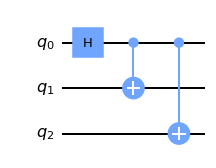

In [4]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)
circ.draw('mpl')

In [5]:
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
circ.add_register(meas.cregs[0])
qc = circ.compose(meas)

#drawing the circuit
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

In [ ]:
# Use Aer's qasm_simulator

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(transpile(qc, backend), shots=10000)

# Grab the results from the job.
result_sim = job_sim.result()

In [ ]:
counts = result_sim.get_counts(qc)
print(counts)

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)